## Módulos
Los módulos a utilizar son los siguiente:
- **numpy**: Proporciona estructuras y funcionalidades que facilitan el cálculo. En el proyecto es utilizado para el manejo de arreglos y el calculo de sumatorias 
- **matplotlib**: Librería que facilita la visualización de los datos.
- **sklearn**: Librería con multiples utilidades para el desarrollo de modelos de inteligencia artificial. Se utilzará el modulo datasets para extraer el conjunto de datos *iris*.
    - De igual manera es empleado el modulo *neighbors* para importar la clase KNeighborsClassifier y hacer uso del algoritmo KNN de sklearn
    - *metrics* es otro modulo en el que se utilizara la matriz confusion y el reporte de clasificacion con la finalidad de facilitar el analisis de los resultados
    - *model_selection* Permite fragmentar el conjunto de datos en dos subconjuntos: Uno para el entrenamiento y otro dirigido a las pruebas del model

In [36]:
#Se importan los modulos
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

## I. Es cargado el conjunto de daatos *iris* de scikit-learn 

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

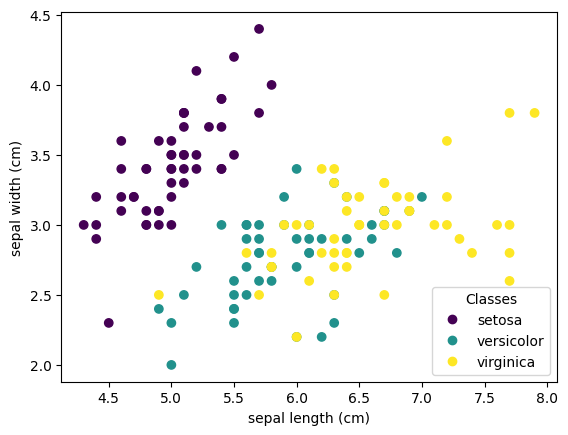

In [37]:
iris = datasets.load_iris()
print(iris.DESCR) # Se muestra la descripcion del dataset junto con los atributos y clases que posee

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
ax.legend(scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes")

## II. Se seleccionan las caracteristicas ”sepal length” y ”sepal width” de las especies "setosa" y "versicolor"

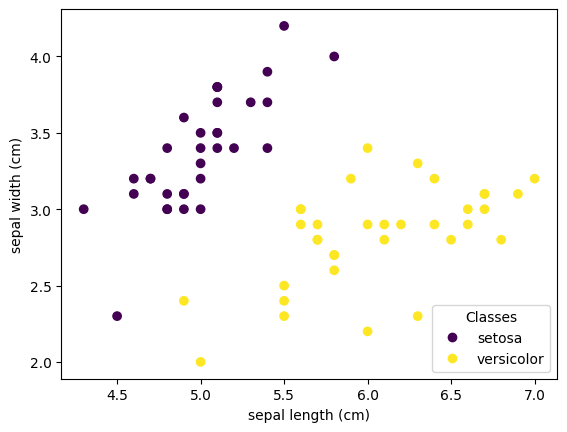

In [38]:
#Es construido un filtro, de manera que en el conjunto de datos solo permanezcan las especies setosa y versicolor
filtro = []
for t in iris.target:        # Iteramos por las clasificaciones correspondientes de cada uno de los puntos 
    filtro.append(t != 2)    # guardaremos aquellas clasificaciones 0 o 1, que son las correspondientes a la setosa y al versicolor

Y = iris.target[filtro] # Se filtran la setosa y el versicolor, son guardadon en el conjunto de valores Y (etiquetas)
n = len(Y) # N es el numero de elemntos que seran manejados

# Se construye el conjunto de pares ordenados que contienen sepal length y sepal width de las especies correspondientes
# De modo que es guardado en la variable X
# Es de destacar que la columna 0 y columna 1 del dataset iris son respectivamente las cateristicas sepal length y sepal width
X = np.array([[iris.data[i, 0], iris.data[i, 1]] for i in range(n)] )  

# Los conjuntos X y Y son fragmentados en dos subconjuntos, el 66% seran insumos para el entrenamiento y el 33% para las
# pruebas del modelo
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.33) 

# Grafica x : sepal length y : sepal width
_, ax = plt.subplots()
scatter = ax.scatter(X_train[:,0], X_train[:,1], c=Y_train)

ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
ax.legend(scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes")


## III. Implementacion del algoritmo de los k vecinos mas cercanos 

In [39]:
def knn_pred(k, X_test):
    sort_criteria = lambda  elem : elem[1]
    y_pred = []
    # Se recorre cada uno de los puntos, cada uno es representado por X, mientras que la i no es mas que el indice del elemento dentro del arreglo
    for i,X in enumerate(X_test): 
        # Se calcula la cada distancia entre el punto X y cada uno de los puntos que forman parte de los datos de entrenamiento
        # d2 guardara cada uno de los valores de la distancia con respecto al punto X con indice i, ammbos datos dentro de una tupla 
        d2 = [ (i, (Xt[0] - X[0])**2 + (Xt[1] - X[1])**2 ) for i, Xt in enumerate(X_train) ]
        # El arreglo d2 es ordenado de menor a mayor en funciopn de la distancia 
        d2.sort(key=sort_criteria)
        # Se seleccionan los primero k pares de d2, que corresponden a los k vecinos mas cercanos de X
        d2 = d2[slice(k)]
        # Se obtiene cada clase (0 o 1) de los k puntos mas cercanos
        values, counts = np.unique( [Y_train[ d[0] ]  for d in d2 ], return_counts=True)
        #Es clasificado el punto X mediante el dato mas concurrente (0 o 1) en el arreglo 
        y_pred.append(values[np.argmax(counts)])
    return np.array(y_pred) # Se retorona un arreglo con los datos clasificados del conjunto de datos X_test

# IV Se evalua el rendimiento del algoritmo con una matriz de confusion y un reporte de clasificacion

[Clasificacion del dataset]  [1 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0]
[Clasificacion calculada]    [1 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0]
              precision    recall  f1-score   support

      setosa       0.94      1.00      0.97        17
  versicolor       1.00      0.94      0.97        16

    accuracy                           0.97        33
   macro avg       0.97      0.97      0.97        33
weighted avg       0.97      0.97      0.97        33



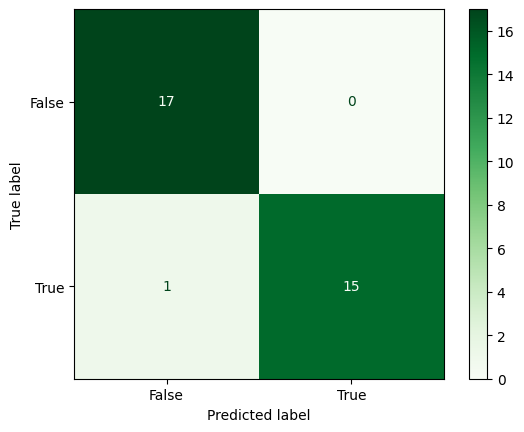

In [40]:
k = 2 # Seleccion de k

y_pred = knn_pred(k,X_test) # llamada de la funcion knn con el conjunto de datos X_test y k
print("[Clasificacion del dataset] ", y_pred) # Se imprime el conjunto de daatos predichos
print("[Clasificacion calculada]   ", Y_test) # Se imprime el conjunto de daatos predichos
# Se imprime la matriz confusion
# [0,0] positivos de la clase 1 
# [0,1] falsos positivos de la clase 2
# [1,0] falsos positivos de la clase 1
# [1,1] positivos de la clase 2
matrix = confusion_matrix(Y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = [False, True])
display.plot(cmap='Greens')
# Adicionalmente, se muestra el reporte de clasificacion para la medicion de precision entre otros datos con el fin de mejorar el analisis 
print(classification_report(Y_test, y_pred, target_names = ['setosa', 'versicolor']))


## V. Optimizacion de k

Text(0, 0.5, 'Error')

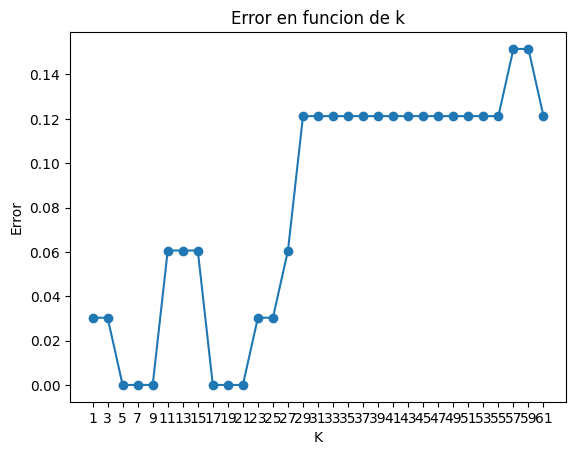

In [41]:
# Para la optimizacion de K se aplica el alogritmo de KNN con cada uno de los valores de k
# y se mide su precision con respecto al conjunto original de datos Y_test mediante una media de todos los datos
# para ese valor de k


k_values = range(1, 62, 2) # se crea una lista de valores para k entre 1 y 66
err = [] # Arreglo que almacena la precision para cada k
for k in k_values:
    y_pred = knn_pred(k, X_test) # llamada del algoritmo knn
    err.append( np.mean(Y_test != y_pred) ) # Se calcula el promedio de los valores predichos con los valores originales

# Grafica para visualizacion de la precision en cada k. Por medio de esta es seleccionado el k ideal
plt.plot(k_values, err, marker = 'o')
plt.xticks(k_values)
plt.title("Error en funcion de k")
plt.xlabel("K")
plt.ylabel("Error")

## VI. KNN de *scikit-learn* comparado con la implementacion propia

[scikit-learn] [1 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0]
[Propio]       [1 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       1.00      1.00      1.00        15

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33



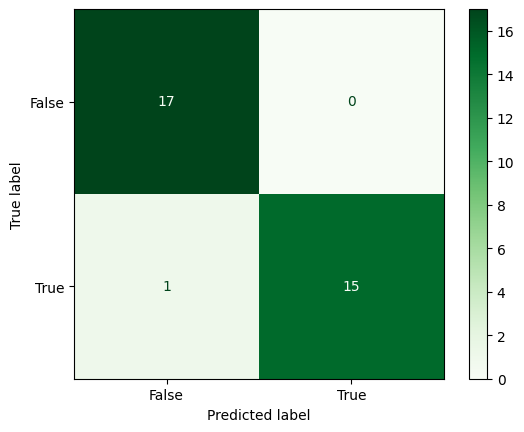

In [42]:
k = 3 # Se elige un valor para k

knn = KNeighborsClassifier(n_neighbors=k) # Se crea una instancia del algoritmi KNN 
knn.fit(X_train, Y_train) # Se adapta el modelo con los conjuntos de datos de entreno
y_pred = knn.predict(X_test) # Se obtiene el conjunto de datos predicho por el algoritmo de scikit-learn
y_pred2 = knn_pred(k, X_test) # Se obtiene el conjunto de datos predicho por la implementacion propia
# Son mostrados ambos conjuntos de datos
print('[scikit-learn]', y_pred)  
print('[Propio]      ', y_pred2)

#Se imprimen la matriz confusion y el reporte de clasificacion
matrix = confusion_matrix(Y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = [False, True])
display.plot(cmap='Greens')
print(classification_report(y_pred, y_pred2, target_names = ['setosa', 'versicolor']))